In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import shap
import sklearn
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("../src/helper-functions"))
import tree_shap

In [19]:
sys.path.append(os.path.abspath("../src/helper-functions"))
import shap_from_original

In [20]:
Tree = DecisionTreeRegressor()

In [21]:
target = [-10] * 10 + [10] * 5 + [5] * 20 + [14] * 5
cat_1 = [1] * 10 + [0] * 30
x = [60] * 5 + [45] * 30 +  [50] * 5
cat_2 = [1] * 15 + [0] * 25
data = pd.DataFrame({"cat_1": cat_1,
                     "cat_2": cat_2,
                     "x": x,
                     "target": target})

In [22]:
Tree.fit(data.values[:,:-1], data.values[:,-1])
explainer_tree = shap.TreeExplainer(Tree)
input_shap = np.array([0,1,60])
print(f"Shap values from the fitted explainer: {explainer_tree.shap_values(input_shap)}")
print(f"Theoretical Shap values: {np.array([191/36, 25/18, 155/36])}")

Shap values from the fitted explainer: [5.30555556 1.38888889 4.30555556]
Theoretical Shap values: [5.30555556 1.38888889 4.30555556]


In [23]:
explainer_tree1 = shap_from_original.TreeExplainer(Tree)
explainer_tree1.shap_values(input_shap.reshape(1,3))

array([[5.30555556, 1.38888889, 4.30555556]])

In [24]:
explainer_tree1_cat = shap_from_original.TreeExplainer(Tree, [[0,1], [2]])
explainer_tree1_cat.shap_values(input_shap.reshape(1,3))

array([[6.83333333, 4.16666667]])

In [26]:
25/6

4.166666666666667

In [6]:
target2 = [-10] * 6 + [10] * 8 + [6] * 4 + [5] * 14 + [4] * 2 + [3] * 3 + [-50] * 3
cat_12 = [1] * 10 + [0] * 30
x2 = [60] * 5 + [45] * 30 +  [50] * 5
cat_22 = [1] * 15 + [0] * 25
data2 = pd.DataFrame({"cat_1": cat_12,
                     "cat_2": cat_22,
                     "x": x2,
                     "target": target2})

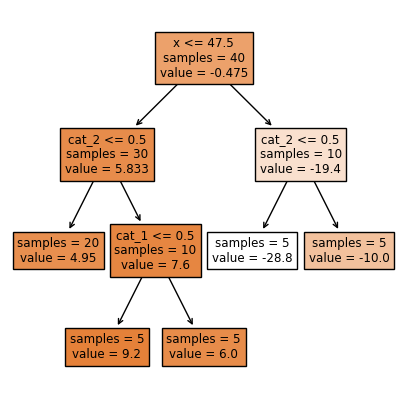

In [7]:
Tree2 = DecisionTreeRegressor()
Tree2.fit(data2.values[:,:-1], data2.values[:,-1])
fig, ax = plt.subplots(figsize = (5,5))
plot_tree(Tree2, ax = ax, filled=True, feature_names = ["cat_1", "cat_2", "x"], impurity = False)
plt.show()
tree2 = Tree2.tree_

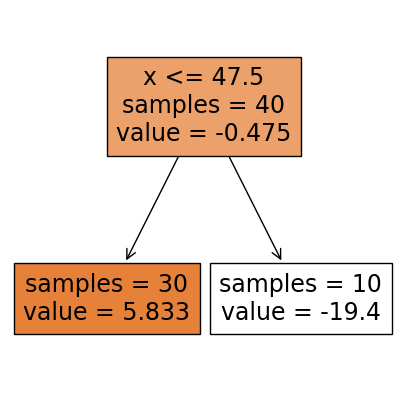

In [8]:
Tree3 = DecisionTreeRegressor(max_depth=1)
Tree3.fit(data2.values[:,:-1], data2.values[:,-1])
fig, ax = plt.subplots(figsize = (5,5))
plot_tree(Tree3, ax = ax, filled=True, feature_names = ["cat_1", "cat_2", "x"], impurity = False)
plt.show()
tree3 = Tree3.tree_

In [9]:
explainer_tree3 = shap_from_original.TreeExplainer(Tree3)

In [10]:
explainer_tree3.shap_values(input_shap.reshape(1,3))

array([[  0.   ,   0.   , -18.925]])

In [11]:
shap.TreeExplainer(Tree2).shap_values(input_shap)

array([  0.33333333,   6.67083333, -16.52916667])

In [12]:
input_shap2 = np.array([0,  1, 10])
shap_3 = shap.TreeExplainer(Tree3).shap_values(input_shap)
print(shap_3)

[  0.      0.    -18.925]


In [13]:
(-3/4)*(5.833333333) - 19.4*3/4

-18.92499999975

In [14]:
input_shap

array([ 0,  1, 60])

In [15]:
nu = tree2.value.flatten()
a = tree2.children_left
b = tree2.children_right
t = tree2.threshold
r = tree2.weighted_n_node_samples
d = tree2.feature
shap_local = tree_shap.cat_tree_shap(input_shap, nu, a, b, t, r, d)
shap_local

node 0
{'node 0': {'weight': [1], 'z': [1], 'o': [1], 'feature': [0]}, 'node 6': {'weight': [1], 'z': [1], 'o': [1], 'feature': [0]}, 'node 1': {'weight': [1], 'z': [1], 'o': [1], 'feature': [0]}}
node 6
{'node 0': {'weight': [1], 'z': [1], 'o': [1], 'feature': [0]}, 'node 6': {'weight': [0.125, 0.5], 'z': [1, 0.25], 'o': [1, 1], 'feature': [0, 2]}, 'node 1': {'weight': [1], 'z': [1], 'o': [1], 'feature': [0]}, 'node 8': {'weight': [0.125, 0.5], 'z': [1, 0.25], 'o': [1, 1], 'feature': [0, 2]}, 'node 7': {'weight': [0.125, 0.5], 'z': [1, 0.25], 'o': [1, 1], 'feature': [0, 2]}}
node 8
node 7
node 1
{'node 0': {'weight': [0.375, 0.0], 'z': [1, 0.75], 'o': [1, 0], 'feature': [0, 2]}, 'node 6': {'weight': [0.041666666666666664, 0.08333333333333333, 0.0], 'z': [1, 0.25, 0.5], 'o': [1, 1, 0], 'feature': [0, 2, 1]}, 'node 1': {'weight': [0.375, 0.0], 'z': [1, 0.75], 'o': [1, 0], 'feature': [0, 2]}, 'node 8': {'weight': [0.041666666666666664, 0.125, 0.3333333333333333], 'z': [1, 0.25, 0.5], 'o'

array([  0.6   ,   9.2375, -12.2625])

In [20]:
for i,elm in enumerate([[1,2,3],[4,5,6]]):
    if 5 in elm:
        print(i)


1


In [11]:

explainer_tree2 = shap_from_original.TreeExplainer(Tree2)
explainer_tree2.shap_values(input_shap.reshape(1,3))

array([[  0.33333333,   6.67083333, -16.52916667]])

In [20]:
import time
t = time.time()
shap.TreeExplainer(Tree2).shap_values(input_shap)
print(time.time()-t)

0.0


In [14]:
(-15/32 + 9/32) * 5.833333333333333 + -14.55

-15.64375

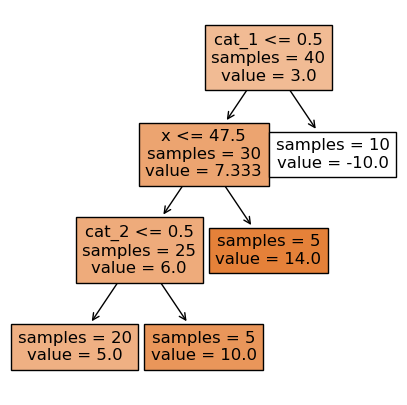

In [13]:

fig, ax = plt.subplots(figsize = (5,5))
plot_tree(Tree, ax = ax, filled=True, feature_names = ["cat_1", "cat_2", "x"], impurity = False)
plt.show()

In [8]:

tree = Tree.tree_
nu = tree.value.flatten()
a = tree.children_left
b = tree.children_right
t = tree.threshold
r = tree.weighted_n_node_samples
d = tree.feature
shap_local = tree_shap.cat_tree_shap(input_shap, nu, a, b, t, r, d)


In [25]:
shap_local

array([0.205     , 4.68925926, 1.38555556])

In [11]:
input_shap = np.array([0,1,60])
print(shap.TreeExplainer(Tree).shap_values(input_shap))


[5.30555556 1.38888889 4.30555556]


In [12]:
input_shap = np.array([0,1,60])
print(shap.TreeExplainer(Tree2).shap_values(input_shap))

[  0.33333333  -1.76666667 -11.46666667]


In [13]:
nu = tree2.value.flatten()
a = tree2.children_left
b = tree2.children_right
t = tree2.threshold
r = tree2.weighted_n_node_samples
d = tree2.feature
shap_local = tree_shap.cat_tree_shap(input_shap, nu, a, b, t, r, d)

node 0
{'feature': [0], 'z': [1], 'o': [1], 'weight': [1]}
False
None 2
{'feature': [0], 'z': [1], 'o': [1], 'weight': [1]}
node 6
{'feature': [0, 2], 'z': [1, 0.25], 'o': [1, 1], 'weight': [1, 0]}
False
None 1
{'feature': [0, 2], 'z': [1, 0.25], 'o': [1, 1], 'weight': [1, 0]}
node 8
{'feature': [0, 2, 1], 'z': [1, 0.25, 0.5], 'o': [1, 1, 1], 'weight': [0.25, 0.5, 0]}
not internal
{'feature': [0, 2, 1], 'z': [1, 0.25, 0.5], 'o': [1, 1, 1], 'weight': [0.25, 0.5, 0]}
unwind1: {'feature': [0, 1], 'z': [1, 0.5], 'o': [1, 1], 'weight': [1.5, 0.0]}
unwind2: {'feature': [0, 2], 'z': [1, 0.25], 'o': [1, 1], 'weight': [1.5, 0.0]}
phi: [  0.    -7.5  -11.25]
gain: -10.0
node 7
{'feature': [0, 2, 1, 1], 'z': [1, 0.25, 0.5, 0.5], 'o': [1, 1, 1, 0], 'weight': [0.08333333333333333, 0.08333333333333333, 0.0, 0]}
not internal
{'feature': [0, 2, 1, 1], 'z': [1, 0.25, 0.5, 0.5], 'o': [1, 1, 1, 0], 'weight': [0.08333333333333333, 0.08333333333333333, 0.0, 0]}
unwind1: {'feature': [0, 1, 1], 'z': [1, 0.5,

In [14]:
shap_local

array([  1.04394531,  -6.90708984, -13.54867839])

In [20]:
input_shap = np.array([0,1,60])
explainer_tree22 = shap.explainers.TreeExplainer(Tree2)
print(explainer_tree22.shap_values(input_shap))
explainer_tree2 = shap.TreeExplainer(Tree2)
print(f"Shap values from the fitted explainer: {explainer_tree2.shap_values(input_shap)}")

[  0.33333333   0.79583333 -14.02916667]
Shap values from the fitted explainer: [  0.33333333   0.79583333 -14.02916667]


In [19]:
m = {"weight":[4,5,4]}

In [20]:
weight = m["weight"].copy()
t = m["weight"][0]
t = 345
print(m)

{'weight': [4, 5, 4]}


In [10]:
a

array([ 1,  2,  3, -1, -1, -1, -1], dtype=int64)

In [10]:
b

array([ 6,  5,  4, -1, -1, -1, -1], dtype=int64)

In [26]:
explainer_tree2 = shap.TreeExplainer(Tree2)
input_shap = np.array([0,1,60])
print(f"Shap values from the fitted explainer: {explainer_tree2.shap_values(input_shap)}")

Shap values from the fitted explainer: [  0.33333333  -1.76666667 -11.46666667]


In [27]:
nu = tree2.value.flatten()
a = tree2.children_left
b = tree2.children_right
t = tree2.threshold
r = tree2.weighted_n_node_samples
d = tree2.feature
shap_local = tree_shap.cat_tree_shap(input_shap, nu, a, b, t, r, d)

{'feature': [0], 'z': [1], 'o': [1], 'weight': [1]}
{'feature': [0, 2], 'z': [1, 0.25], 'o': [1, 1], 'weight': [1, 0]}
{'feature': [0, 2, 1], 'z': [1, 0.25, 0.5], 'o': [1, 1, 1], 'weight': [0.25, 0.5, 0]}
1.5
1.5
{'feature': [0, 2, 1, 1], 'z': [1, 0.25, 0.5, 0.5], 'o': [1, 1, 1, 0], 'weight': [0.08333333333333333, 0.08333333333333333, 0.0, 0]}
0.3333333333333333
0.3333333333333333
0.5555555555555556
{'feature': [0, 2, 1, 1, 2], 'z': [1, 0.25, 0.5, 0.5, 0.75], 'o': [1, 1, 1, 0, 0], 'weight': [0.046875, 0.03125, 0.0, 0.0, 0]}
{'feature': [0, 2, 1, 2, 1], 'z': [1, 0.25, 0.5, 0.75, 0.16666666666666666], 'o': [1, 1, 0, 0, 1], 'weight': [0.01953125, 0.0390625, 0.0, 0.0, 0]}
{'feature': [2, 1, 2, 1, 0], 'z': [0.25, 0.5, 0.75, 0.16666666666666666, 0.5], 'o': [1, 0, 0, 1, 1], 'weight': [0.0732421875, 0.048828125, 0.0, 0.0, 0]}
0.34586588541666663
0.23057725694444445
0.244140625
0.244140625
{'feature': [2, 1, 2, 1, 0, 0], 'z': [0.25, 0.5, 0.75, 0.16666666666666666, 0.5, 0.5], 'o': [1, 0, 0, 1, 1

In [28]:
shap_local

array([  1.04394531,  -6.90708984, -13.54867839])

In [18]:
tree.feature

array([ 0,  2,  1, -2, -2, -2, -2], dtype=int64)